# Chicago Crime

## Description

Origin: Chicago data portal (https://data.cityofchicago.org/)

Last updated: xx/xx/xxxx

## Packages (Python)

In [6]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go

import geopandas as gpd
import geopy as gp
import shapely
import geojson
#import rtree
#import pygeos
#import fiona

In [9]:
# Preprocessing files
from preprocessing import *

## Chicago Polygon 

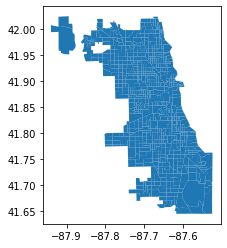

In [10]:
# Reading file that must be uploaded

chicago = gpd.read_file('chicago.shp')
chicago.plot()

## Data processing

In [11]:
url = "https://data.cityofchicago.org/resource/dfnk-7re6.json"
crime_raw = pd.read_json(url)

In [12]:
crime_raw.head()

,case_,date_of_occurrence,block,_primary_decsription,fbi_cd,_secondary_description,ward,_location_description,domestic,beat,...,:@computed_region_43wa_7qmu,location,y_coordinate,latitude,:@computed_region_awaf_s7ux,x_coordinate,longitude,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k
0,JF156487,2021-12-01T00:01:00.000,056XX N SPAULDING AVE,OTHER OFFENSE,08A,TELEPHONE THREAT,39,APARTMENT,N,1711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JE362576,2021-09-05T14:47:00.000,102XX S VERNON AVE,CRIMINAL DAMAGE,14,TO VEHICLE,9,STREET,Y,511,...,43.0,"{'latitude': '41.708514886', 'human_address': ...",1837198.0,41.708515,30.0,1181052.0,-87.612580,570.0,21861.0,45.0
2,JE364188,2021-09-07T01:00:00.000,033XX W MAYPOLE AVE,ASSAULT,08A,SIMPLE,28,SIDEWALK,N,1123,...,23.0,"{'latitude': '41.883578698', 'human_address': ...",1900783.0,41.883579,11.0,1154061.0,-87.709735,176.0,21572.0,28.0
3,JE364232,2021-09-07T02:26:00.000,062XX S UNION AVE,CRIMINAL DAMAGE,14,TO PROPERTY,16,RESTAURANT,N,711,...,2.0,"{'latitude': '41.780509717', 'human_address': ...",1863365.0,41.780510,19.0,1172637.0,-87.642627,435.0,21559.0,66.0
4,JE369345,2021-08-14T06:20:00.000,0000X W TERMINAL ST,THEFT,06,FROM BUILDING,41,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,N,1651,...,29.0,"{'latitude': '41.979006297', 'human_address': ...",1935229.0,41.979006,34.0,1100317.0,-87.906463,668.0,16197.0,75.0


In [18]:
crime_raw["location"]

0                                                    NaN
1      {'latitude': '41.708514886', 'human_address': ...
2      {'latitude': '41.883578698', 'human_address': ...
3      {'latitude': '41.780509717', 'human_address': ...
4      {'latitude': '41.979006297', 'human_address': ...
                             ...                        
995    {'latitude': '41.747359051', 'human_address': ...
996    {'latitude': '41.886373739', 'human_address': ...
997    {'latitude': '41.892963428', 'human_address': ...
998    {'latitude': '41.8744151', 'human_address': '{...
999    {'latitude': '41.766450968', 'human_address': ...
Name: location, Length: 1000, dtype: object

In [20]:
crime_located = pd.DataFrame()
crime_located = extract_location(crime_raw)

In [21]:
crime_located.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   case_                        1000 non-null   object 
 1   date_of_occurrence           1000 non-null   object 
 2   block                        1000 non-null   object 
 3   _primary_decsription         1000 non-null   object 
 4   fbi_cd                       1000 non-null   object 
 5   _secondary_description       1000 non-null   object 
 6   ward                         1000 non-null   int64  
 7   _location_description        997 non-null    object 
 8   domestic                     1000 non-null   object 
 9   beat                         1000 non-null   int64  
 10  _iucr                        1000 non-null   object 
 11  arrest                       1000 non-null   object 
 12  :@computed_region_43wa_7qmu  975 non-null    float64
 13  location           

In [22]:
crime_located.describe()

,ward,beat,:@computed_region_43wa_7qmu,y_coordinate,:@computed_region_awaf_s7ux,x_coordinate,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k
count,1000.000000,1000.000000,975.000000,9.770000e+02,975.000000,9.770000e+02,974.000000,977.000000,975.000000
mean,24.216000,1160.508000,26.748718,1.886658e+06,27.832821,1.164510e+06,387.208419,19084.051177,39.073846
std,13.823112,700.058865,14.415492,3.185891e+04,15.373373,1.668331e+04,231.768301,5737.365364,19.520291
min,1.000000,111.000000,1.000000,1.816442e+06,1.000000,1.100317e+06,1.000000,2733.000000,1.000000
25%,12.000000,611.000000,14.000000,1.858970e+06,14.000000,1.152346e+06,177.500000,21184.000000,25.000000
50%,24.000000,1034.000000,29.000000,1.893415e+06,29.000000,1.166120e+06,399.000000,21560.000000,37.000000
75%,36.000000,1715.250000,38.000000,1.908643e+06,41.000000,1.176452e+06,580.000000,22216.000000,57.000000
max,50.000000,2535.000000,50.000000,1.951163e+06,53.000000,1.204455e+06,799.000000,22620.000000,77.000000


In [24]:
crime_located.isnull().sum()

case_                           0
date_of_occurrence              0
block                           0
_primary_decsription            0
fbi_cd                          0
_secondary_description          0
ward                            0
_location_description           3
domestic                        0
beat                            0
_iucr                           0
arrest                          0
:@computed_region_43wa_7qmu    25
location                       23
y_coordinate                   23
latitude                       23
:@computed_region_awaf_s7ux    25
x_coordinate                   23
longitude                      23
:@computed_region_bdys_3d7i    26
:@computed_region_6mkv_f3dw    23
:@computed_region_vrxf_vc4k    25
dtype: int64

In [25]:
location_null = crime_located['location'].isnull().sum()
print(location_null)

23


In [26]:
crime_located = crime_located.dropna()

## Geoencoding

In [27]:
crime_geo = gpd.GeoDataFrame(crime_located, geometry = gpd.points_from_xy(crime_located.longitude, crime_located.latitude))

## Plots

Text(0.5, 1.0, 'Crime in Chicago')

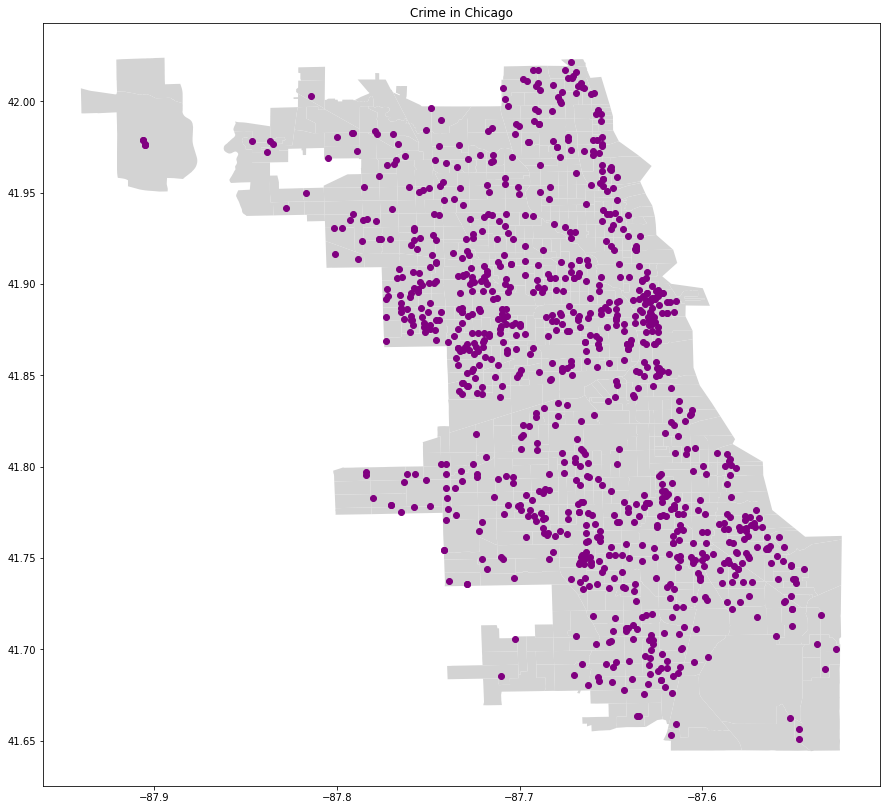

In [29]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
crime_geo.plot(ax = ax, color = 'purple')
ax.set_title('Crime in Chicago')